# 4º Período ✅

# Tratamento de dados 

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import google.colab
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/IEEE/creditcard.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# coluna time não tem função, é apenas enumerativa para as entradas
df = df.drop('Time', axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [ ]:
# verificando se há valores faltantes
df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# verificando valores únicos de output da label 'Class'
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

* Como há muitos mais valores de 0 que 1, é possível que a análise fique viciada em prever 0. Deste modo, no decorer da análise, será necessário lidar com esse problema de overfitting decorrente de um número desbalanceado de amostras binárias.

In [ ]:
# separar label das features
X = df.drop('Class', axis = 1)
X = np.array(X)

y = df[['Class', 'Amount']]
y = y.drop('Amount', axis = 1)
y = np.array(y)

In [ ]:
print(X.shape, y.shape)

(284807, 29) (284807, 1)


In [ ]:
# dividir dataset de treinamento e dataset de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
print(len(X), len(X_train), len(X_test))
print(len(y), len(y_train), len(y_test))

284807 227845 56962
284807 227845 56962


In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(227845, 29) (56962, 29) (227845, 1) (56962, 1)


In [ ]:
X_train = X_train.T
y_train = y_train.reshape(1, y_train.shape[0])
X_test = X_test.T
y_test = y_test.reshape(1, y_test.shape[0])

In [ ]:
print(len(X), len(X_train), len(X_test))
print(len(y), len(y_train), len(y_test))

284807 29 29
284807 1 1


# Perceptron with numpy

In [ ]:
# definição da entrada, layers e saída do perceptron
def frame(X, y, num_hidden_layers = 2):
  X = X.shape[0]
  hidden_layers = num_hidden_layers
  y = y.shape[0]
  
  return (X, hidden_layers, y)

In [ ]:
(X_input, hidden_layers, y_output) = frame(X_train, y_train)

In [ ]:
# inicialização ramdômica
def randomic_inicialization(X_input, hidden_layers, y_output):
  np.random.seed(0)
  weight1 = np.random.rand(hidden_layers, X_input)
  bias1 = np.zeros((hidden_layers, 1))
  weight2 = np.random.rand(y_output, hidden_layers)
  bias2 = np.zeros((y_output, 1))
  terms = {'Weight1': weight1,
            'Bias1': bias1,
            'Weight2': weight2,
            'Bias2': bias2}

  return terms

In [ ]:
# função de ativação hidden layers - ReLu
def relu(X):
  return np.maximum(X, 0) # reta crescente

# função de ativação output - sigmoide
def sigmoide(z):
  return 1/(1 + np.exp(-z))

# propagação para frente
def foward_propagation(X, terms):
  weight1 = terms['Weight1']
  bias1 = terms['Bias1']
  weight2 = terms['Weight2']
  bias2 = terms['Bias2']

  z1 = np.dot(weight1, X) + bias1
  out1 = relu(z1)
  z2 = np.dot(weight2, out1) + bias2
  out2 = sigmoide(z2)

  result = {'z1': z1, 
            'out1': out1,
            'z2': z2,
            'out2': out2}
  return out2, result

In [ ]:
# calcular o custo 
def cost(out2, y, terms):
  num_y = y.shape[1]

  aux = np.multiply(np.log(out2), y) + np.multiply((1 - y), np.log(1 - out2))
  cost_ = - np.sum(aux) / num_y 
  cost_ = float(np.squeeze(cost_))

  return cost_

# propagação para trás - backpropagation
def backpropagation(terms, result, X, y):
  num_x = X.shape[1]

  b_weight1 = terms['Weight1']
  b_weight2 = terms['Weight2']
  b_out1 = result['out1']
  b_out2 = result['out2']

  dz2 = b_out2 - y
  dw2 = (1 / num_x) * np.dot(dz2, b_out1.T)
  db2 = (1 / num_x) * np.sum(dz2, axis = 1, keepdims = True)
  dz1 = np.multiply(np.dot(b_weight2.T, dz2), 1 - np.power(b_out1, 2))
  dw1 = (1 / num_x) * np.dot(dz1, X.T)
  db1 = (1 / num_x) * np.sum(dz1, axis = 1, keepdims = True)

  minus_grad = {'-dw1': dw1,
                '-dw2': dw2,
                '-db1': db1,
                '-db2': db2}
  return minus_grad 

In [ ]:
# função gradiente descendente
def grad_descent(terms, minus_grad, lr = 0.01):
  weight1 = terms['Weight1']
  bias1 = terms['Bias1']
  weight2 = terms['Weight2']
  bias2 = terms['Bias2']

  dw1 = minus_grad['-dw1']
  db1 = minus_grad['-db1']
  dw2 = minus_grad['-dw2']
  db2 = minus_grad['-db2']

  #atualizando os parâmetros
  weight1 = weight1 + (lr * dw1)
  bias1 = bias1 + (lr * db1)
  weight2 = weight2 - (lr * dw2)
  bias2 = bias2 - (lr * db2)

  terms = {'Weight1': weight1,
                'Bias1': bias1, 
                'Weight2': weight2,
                'Bias2': bias2}
                
  return terms

In [ ]:
# treinamento do perceptron
def perceptron_fit(X, y, hidden_layers, epochs = 20000):
  np.random.seed(0)

  X_input = frame(X, y)[0]
  y_output = frame(X, y)[2]

  terms = randomic_inicialization(X_input, hidden_layers, y_output)

  weight1 = terms['Weight1']
  bias1 = terms['Bias1']
  weight2 = terms['Weight2']
  bias2 = terms['Bias2']

  for idx in range(0, epochs):
    out2, result = foward_propagation(X, terms)
    cost_ = cost(out2, y, terms)
    minus_grad = backpropagation(terms, result, X, y)
    terms = grad_descent(terms, minus_grad)

    return terms

terms = perceptron_fit(X_train, y_train, 2, epochs = 20000)
terms

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


{'Bias1': array([[-87.09157391],
        [-10.65609449]]),
 'Bias2': array([[-0.00914152]]),
 'Weight1': array([[ 5.38953960e+02,  9.08408537e+02,  3.75016607e+02,
         -2.18474665e+02,  5.14513408e+02, -2.67400077e+02,
         -5.76761377e+02,  1.25388896e+02,  4.07042143e+01,
          1.44531053e+02, -9.15835845e+00,  1.53021227e+01,
         -3.13715893e+01, -5.24760411e+01, -2.60825691e+01,
         -4.15705544e+01, -3.74159476e+00, -4.17995480e+01,
          7.52364944e+01, -4.19075697e+02, -1.20364323e+02,
          1.03202980e+02,  1.26713030e+02, -8.88569924e+00,
          5.75621594e+01,  1.78520662e+01,  2.56795265e+00,
         -1.25644571e+01, -3.02619857e+05],
        [ 6.63675295e+01,  1.11505731e+02,  4.65231517e+01,
         -2.64617869e+01,  6.33040950e+01, -3.26321321e+01,
         -6.99420187e+01,  1.57692261e+01,  5.48240225e+00,
          1.85151145e+01, -5.85332389e-01,  2.19148428e+00,
         -3.49083794e+00, -5.83499378e+00, -3.13683368e+00,
         -4.

In [ ]:
def perceptron_pred(terms, X):
  out2, result = foward_propagation(X, terms)
  y_pred = np.round(out2)
  
  return y_pred 

In [ ]:
predictions = perceptron_pred(terms, X_train)
print ('Accuracy Train: %d' % float((np.dot(y_train, predictions.T) + np.dot(1 - y_train, 1 - predictions.T))/float(y_train.size)*100) + '%')

predictions = perceptron_pred(terms, X_test)
print ('Accuracy Test: %d' % float((np.dot(y_test, predictions.T) + np.dot(1 - y_test, 1 - predictions.T))/float(y_test.size)*100) + '%')

Accuracy Train: 99%
Accuracy Test: 99%


A acurácia foi muito alta. É possível que a análise esteja viciada pois existem:


* 0  -  284315 amostras

* 1  -    492 amostras 

Existem muito mais amostras com 0 (sem fraude) do que amostras com 1 (com fraude), o que pode acabar viciando o modelo e ocorrendo **overfitting** (aprende até demais sobre o modelo e, de um certo modo, "decora" as labels. 

# Ajustando as amostras manualmente para corrigir overfitting

In [ ]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# dados para class = 1

df_new = df.copy()

aux = df_new.query('Class == 1')
X_1 = aux.drop('Class', axis = 1)
X_1 = np.array(X_1)

y_1 = aux[['Class', 'Amount']]
y_1 = y_1.drop('Amount', axis = 1)
y_1 = np.array(y_1)


print(X_1.shape, y_1.shape)

(492, 29) (492, 1)


In [ ]:
# dados para class = 0

aux2 = df_new.query('Class == 0')

X_2 = aux2.drop('Class', axis = 1)
X_2 = np.array(X_2)

y_2 = aux2[['Class', 'Amount']]
y_2 = y_2.drop('Amount', axis = 1)
y_2 = np.array(y_2)

y_2 = y_2[:394]
print(X_2.shape, y_2.shape)

(284315, 29) (394, 1)


In [ ]:
X2_train = np.concatenate((X_1[:394], X_2[:394]))
X2_test = np.concatenate((X_1[:98], X_2[:98]))

y2_train = np.concatenate((y_1[:394], y_2[:394]))
y2_test = np.concatenate((y_1[:98], y_2[:98]))

In [ ]:
print(X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape)

(788, 29) (196, 29) (788, 1) (196, 1)


In [ ]:
X2_train_f = X2_train.T
y2_train_f = y2_train.reshape(1, y2_train.shape[0])
X2_test_f = X2_test.T
y2_test_f = y2_test.reshape(1, y2_test.shape[0])

In [ ]:
(X_input, hidden_layers, y_output) = frame(X2_train_f, y2_train_f)

In [ ]:
terms = perceptron_fit(X2_train_f, y2_train_f, 2, epochs = 20000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


In [ ]:
def perceptron_pred(terms, X):
  out2, result = foward_propagation(X, terms)
  y_pred = np.round(out2)
  
  return y_pred 

In [ ]:
predictions = perceptron_pred(terms, X2_train_f)
print ('Accuracy Train: %d' % float((np.dot(y2_train_f, predictions.T) + np.dot(1 - y2_train_f, 1 - predictions.T))/float(y2_train_f.size)*100) + '%')

predictions = perceptron_pred(terms, X2_test_f)
print ('Accuracy Test: %d' % float((np.dot(y2_test_f, predictions.T) + np.dot(1 - y2_test_f, 1 - predictions.T))/float(y2_test_f.size)*100) + '%')

Accuracy Train: 51%
Accuracy Test: 51%


* A diminuição de amostras diminuiu a eficácia da rede de duas camadas ocultas.

# Ajustando as amostras com oversampling para corrigir overfitting

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE()
aux = df[['Class', 'Amount']]
Xo_smote, yo_smote = smote.fit_resample(df.drop(columns = 'Class'), aux.drop(columns = 'Amount'))

In [ ]:
Xo_smote = np.array(Xo_smote)
yo_smote = np.array(yo_smote)

In [ ]:
Xo_train, Xo_test, yo_train, yo_test = train_test_split(Xo_smote, yo_smote, test_size = 0.2, random_state = 0)

In [ ]:
print(Xo_train.shape, Xo_test.shape, yo_train.shape, yo_test.shape)

(454904, 29) (113726, 29) (454904, 1) (113726, 1)


In [ ]:
Xo_train = Xo_train.T
yo_train = yo_train.reshape(1, yo_train.shape[0])
Xo_test = Xo_test.T
yo_test = yo_test.reshape(1, yo_test.shape[0])

In [ ]:
(X_input, hidden_layers, y_output) = frame(Xo_train, yo_train)

In [ ]:
terms = perceptron_fit(Xo_train, yo_train, 2, epochs = 20000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


In [ ]:
def perceptron_pred(terms, X):
  out2, result = foward_propagation(X, terms)
  y_pred = np.round(out2)
  
  return y_pred 

In [ ]:
predictions = perceptron_pred(terms, Xo_train)
print ('Accuracy Train: %d' % float((np.dot(yo_train, predictions.T) + np.dot(1 - yo_train, 1 - predictions.T))/float(yo_train.size)*100) + '%')

predictions = perceptron_pred(terms, Xo_test)
print ('Accuracy Test: %d' % float((np.dot(yo_test, predictions.T) + np.dot(1 - yo_test, 1 - predictions.T))/float(yo_test.size)*100) + '%')

Accuracy Train: 50%
Accuracy Test: 50%


O aumento das amostras com o oversampling também não garantiu uma eficácia muito boa. Provavelmente, as amostras criadas para operações fraudulentas (Class = 1) não foram muito parecidas com as do dataset original.

# Percentron with sklearn

In [ ]:
from sklearn.linear_model import Perceptron 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
perceptron = Perceptron()

In [ ]:
perceptron.fit(X2_train, y2_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron()

In [ ]:
y_pred = perceptron.predict(X2_test)

In [ ]:
metrics = classification_report(y2_test, y_pred)

print(metrics)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        98
           1       1.00      0.95      0.97        98

    accuracy                           0.97       196
   macro avg       0.98      0.97      0.97       196
weighted avg       0.98      0.97      0.97       196



* 97% de acurácia com o perceptron do sklearn (amostras com label igualmente distribuídas). 
* Alta acurácia em decorrência da implementação por biblioteca.

# Treinando a rede neural com o Tensor Flow 

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.models.Sequential()  # Cria uma rede neural sequencial - feed foward
model.add(keras.layers.Dense(2, activation='relu', input_shape=X_train[0].shape)) # primeira hidden layer
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, activation= 'sigmoid')) # output layer com ativação sigmoid

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 2)                 60        
                                                                 
 dropout_7 (Dropout)         (None, 2)                 0         
                                                                 
 dense_15 (Dense)            (None, 1)                 3         
                                                                 
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________


**função compile()** configura o modelo:
*   optimizer atualiza os pesos da rede
*   loss é a função de erro que a rede minimiza



In [ ]:
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["binary_accuracy"])

* batch size é a quantidade de "pacotes" que as amostras estão divididas.
* epochs é a quantidade de ciclos.

In [ ]:
batch_size = 500  # X_train 42397 / 500 = 84.79 (então são 500 batches de 85)
epochs = 500

history  = model.fit(X2_train, y2_train,
                     batch_size=batch_size,
                     epochs=epochs,
                     verbose=1,
                     validation_data=(X2_test, y2_test))

Epoch 1/500
2/2 [==============================] - 0s 91ms/step - loss: nan - binary_accuracy: 0.5000 - val_loss: nan - val_binary_accuracy: 0.5000
Epoch 2/500
2/2 [==============================] - 0s 46ms/step - loss: nan - binary_accuracy: 0.5000 - val_loss: nan - val_binary_accuracy: 0.5000
Epoch 3/500
2/2 [==============================] - 0s 53ms/step - loss: nan - binary_accuracy: 0.5000 - val_loss: nan - val_binary_accuracy: 0.5000
Epoch 4/500
2/2 [==============================] - 0s 39ms/step - loss: nan - binary_accuracy: 0.5000 - val_loss: nan - val_binary_accuracy: 0.5000
Epoch 5/500
2/2 [==============================] - 0s 49ms/step - loss: nan - binary_accuracy: 0.5000 - val_loss: nan - val_binary_accuracy: 0.5000
Epoch 6/500
2/2 [==============================] - 0s 76ms/step - loss: nan - binary_accuracy: 0.5000 - val_loss: nan - val_binary_accuracy: 0.5000
Epoch 7/500
2/2 [==============================] - 0s 36ms/step - loss: nan - binary_accuracy: 0.5000 - val_loss

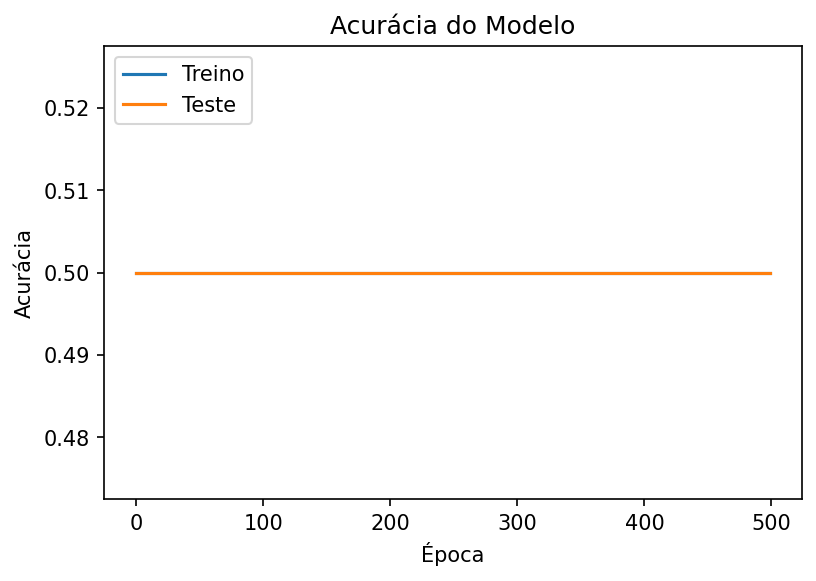

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.dpi'] = 150

# Plot acurácia de treino e teste
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Acurácia do Modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['Treino', 'Teste'], loc='upper left')
plt.show()

 A rede neural implementada pelo Keras do Tensor Flow foi treinada com amostras igualmente distribuídas (~ 492 inputs com Class = 1, ~ 492 inputs com Class = 0). A acurácia não foi muito satisfatória provavelmente pela baixa quantidade de amostras treinadas ou devido a própria implementação do Keras não ser a melhor opção para fazer uma classificação binária.

* Acurácia ~ 50%. 